In [56]:
import pandas as pd

In [57]:
import numpy as np

In [58]:
import matplotlib.pyplot as plt

In [59]:
import re

In [60]:
import seaborn as sns

In [61]:
%matplotlib inline

In [62]:
from sklearn.linear_model import LinearRegression

In [123]:
from sklearn.model_selection import train_test_split

In [169]:
import statsmodels.formula.api as smf

In [131]:
from sklearn import metrics

In [133]:
from sklearn.metrics import r2_score

In [64]:
from sklearn.linear_model import Lasso

In [65]:
n = r'C:\Users\Kush baba the great\Desktop\Datashapa\datasets\linear regression\cars.csv'

In [66]:
df = pd.read_csv(n)

INITIAL EXPLORATION

In [67]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [69]:
df.duplicated().sum()

1202

In [70]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

DATA CLEANING

Null values: delete Null values from milage, engine, max_power, torque, seats

drop irrelevant columns: Name , Torque 

Duplicates: DROP duplicates value 

String value manipulation and change data type: mileage , engine, max power

ENCODE and change data type : fuel, seller type, transmission, owner 

In [71]:
# DROP NULL VALUES 
df.dropna(inplace=True)

In [72]:
# Drop irrelevant columns 
df.drop(["name","torque"],axis=1,inplace = True)

In [73]:
df = df.drop_duplicates()

String value manipulation : mileage , engine, max power

In [74]:
# mileage string value manipulation and data change 
df["mileage"] = df["mileage"].str.replace('[a-zA-Z]',"").str.strip("/").astype(float)

In [75]:
df["engine"] = df["engine"].str.replace('[a-zA-Z]',"").astype(float)

In [76]:
df["max_power"] = df["max_power"].str.replace('[a-zA-Z]',"").astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6698 non-null   int64  
 1   selling_price  6698 non-null   int64  
 2   km_driven      6698 non-null   int64  
 3   fuel           6698 non-null   object 
 4   seller_type    6698 non-null   object 
 5   transmission   6698 non-null   object 
 6   owner          6698 non-null   object 
 7   mileage        6698 non-null   float64
 8   engine         6698 non-null   float64
 9   max_power      6698 non-null   float64
 10  seats          6698 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 627.9+ KB


ENCODE The columns: fuel, seller type, transmission, owner 

In [78]:
# One-hot encoding fuel as it's nominal categorical value 
df = pd.get_dummies(df, columns=['fuel'])

In [79]:
# One-hot encoding seller_type as it's nominal categorical value 
df = pd.get_dummies(df, columns=['seller_type'])

In [80]:
# One-hot encoding transmission as it's nominal categorical value 
df = pd.get_dummies(df, columns=['transmission'])

In [81]:
# One-hot encoding owner as it's nominal categorical value 
df = pd.get_dummies(df, columns=['owner'])

In [82]:
df = df.astype(float)

#FEATURE SCALING of each column

In [83]:
df['year'] = (df['year'] - df['year'].mean()) / df['year'].std()

In [84]:
df['km_driven'] = (df['km_driven'] - df['km_driven'].mean()) / df['km_driven'].std()

In [85]:
df['mileage'] = (df['mileage'] - df['mileage'].mean()) / df['mileage'].std()

In [86]:
df['engine'] = (df['engine'] - df['engine'].mean()) / df['engine'].std()

In [87]:
df['engine'] = (df['engine'] - df['engine'].mean()) / df['engine'].std()

In [88]:
df['max_power'] = (df['max_power'] - df['max_power'].mean()) / df['max_power'].std()

In [89]:
df['seats'] = (df['seats'] - df['seats'].mean()) / df['seats'].std()

In [90]:
df['fuel_CNG'] = (df['fuel_CNG'] - df['fuel_CNG'].mean()) / df['fuel_CNG'].std()

In [91]:
df['fuel_Diesel'] = (df['fuel_Diesel'] - df['fuel_Diesel'].mean()) / df['fuel_Diesel'].std()

In [92]:
df['fuel_LPG'] = (df['fuel_LPG'] - df['fuel_LPG'].mean()) / df['fuel_LPG'].std()

In [93]:
df['fuel_Petrol'] = (df['fuel_Petrol'] - df['fuel_Petrol'].mean()) / df['fuel_Petrol'].std()

In [94]:
df['seller_type_Dealer'] = (df['seller_type_Dealer'] - df['seller_type_Dealer'].mean()) / df['seller_type_Dealer'].std()

In [95]:
df['seller_type_Individual'] = (df['seller_type_Individual'] - df['seller_type_Individual'].mean()) / df['seller_type_Individual'].std()

In [96]:
df['seller_type_Trustmark Dealer'] = (df['seller_type_Trustmark Dealer'] - df['seller_type_Trustmark Dealer'].mean()) / df['seller_type_Trustmark Dealer'].std()

In [97]:
df['transmission_Automatic'] = (df['transmission_Automatic'] - df['transmission_Automatic'].mean()) / df['transmission_Automatic'].std()

In [98]:
df['transmission_Manual'] = (df['transmission_Manual'] - df['transmission_Manual'].mean()) / df['transmission_Manual'].std()

In [99]:
df['owner_First Owner'] = (df['owner_First Owner'] - df['owner_First Owner'].mean()) / df['owner_First Owner'].std()

In [100]:
df['owner_Fourth & Above Owner'] = (df['owner_Fourth & Above Owner'] - df['owner_Fourth & Above Owner'].mean()) / df['owner_Fourth & Above Owner'].std()

In [101]:
df['owner_Second Owner'] = (df['owner_Second Owner'] - df['owner_Second Owner'].mean()) / df['owner_Second Owner'].std()

In [102]:
df['owner_Test Drive Car'] = (df['owner_Test Drive Car'] - df['owner_Test Drive Car'].mean()) / df['owner_Test Drive Car'].std()

In [103]:
df['owner_Third Owner'] = (df['owner_Third Owner'] - df['owner_Third Owner'].mean()) / df['owner_Third Owner'].std()

In [104]:
df['selling_price'] = (df['selling_price'] - df['selling_price'].mean()) / df['selling_price'].std()

In [105]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.100534,-0.146123,1.227986,0.971590,-0.371228,-0.434405,-0.441036,-0.087587,0.913753,-0.072471,...,-0.332257,0.339686,-0.063614,-0.306422,0.306422,0.781028,-0.153902,-0.625771,-0.02733,-0.281851
1,0.100534,-0.298748,0.793626,0.413483,0.135521,0.495698,-0.441036,-0.087587,0.913753,-0.072471,...,-0.332257,0.339686,-0.063614,-0.306422,0.306422,-1.280172,-0.153902,1.597790,-0.02733,-0.281851
2,-1.950878,-0.703204,1.134300,-0.436024,0.133494,-0.308375,-0.441036,-0.087587,-1.094225,-0.072471,...,-0.332257,0.339686,-0.063614,-0.306422,0.306422,-1.280172,-0.153902,-0.625771,-0.02733,3.547440
3,-0.925172,-0.575381,0.912862,0.872810,-0.071233,0.069716,-0.441036,-0.087587,0.913753,-0.072471,...,-0.332257,0.339686,-0.063614,-0.306422,0.306422,0.781028,-0.153902,-0.625771,-0.02733,-0.281851
4,-1.694452,-0.756623,0.793626,-0.831144,-0.269878,0.013002,-0.441036,-0.087587,-1.094225,-0.072471,...,-0.332257,0.339686,-0.063614,-0.306422,0.306422,0.781028,-0.153902,-0.625771,-0.02733,-0.281851


DATA CLEANING and FEATURE ENGIINEERING DONE 

FEATURE SELECTION with L1 Lasso since it's supervised model

In [106]:
X = df.drop("selling_price",axis=1)
y= df['selling_price']

In [107]:
# Create a Lasso regression model with a specified alpha (regularization strength)
alpha = 0.01  # You can adjust alpha to control the strength of regularization
lasso_model = Lasso(alpha=alpha)

# Fit the Lasso model to the training data
lasso_model.fit(X,y)      # df_ xy are variables that store relevant column and value

# Get the coefficients of the Lasso model
feature_coefficients = lasso_model.coef_

#inspect the model coefficients to see feature coefficents
print('Feature Importance:')
for feature, coef in zip(X.columns, feature_coefficients):
    print(f'{feature}: {coef}')

Feature Importance:
year: 0.2504078954555494
km_driven: -0.06110537202355245
mileage: 0.004436695782321078
engine: 0.02912499544694147
max_power: 0.5142527230111541
seats: -0.0
fuel_CNG: -0.0
fuel_Diesel: 0.0
fuel_LPG: 0.0
fuel_Petrol: -0.06943972894581832
seller_type_Dealer: 0.053470067192449997
seller_type_Individual: -0.0
seller_type_Trustmark Dealer: -0.0
transmission_Automatic: 0.1569760445479484
transmission_Manual: -1.0822063468349381e-16
owner_First Owner: 0.04492819522252256
owner_Fourth & Above Owner: 0.0
owner_Second Owner: -0.0
owner_Test Drive Car: 0.1352559019092851
owner_Third Owner: -0.0


From the above L1 analysis we can come to the conclusion that few columns can be dropped. These columsn are either zero or very close to zero(difference from zero is less than 0.01 or -0.01)

In [112]:
# Create a new dataframe with the relevant columns after L1 analysis 
df1 = df.iloc[:,[0,1,2,4,5,10,11,14,15,16,19]]

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6698 non-null   float64
 1   selling_price           6698 non-null   float64
 2   km_driven               6698 non-null   float64
 3   engine                  6698 non-null   float64
 4   max_power               6698 non-null   float64
 5   fuel_Petrol             6698 non-null   float64
 6   seller_type_Dealer      6698 non-null   float64
 7   transmission_Automatic  6698 non-null   float64
 8   transmission_Manual     6698 non-null   float64
 9   owner_First Owner       6698 non-null   float64
 10  owner_Test Drive Car    6698 non-null   float64
dtypes: float64(11)
memory usage: 627.9 KB


In [ ]:
# How to find multicolleanirity and select optimal number of features 

In [114]:
corr_mat = df1.corr()

visualize correlation matrix. We try to find multicollinearity and the common threshold is if the correlation between 2 columns is greater than 0.7 or less than -0.7 

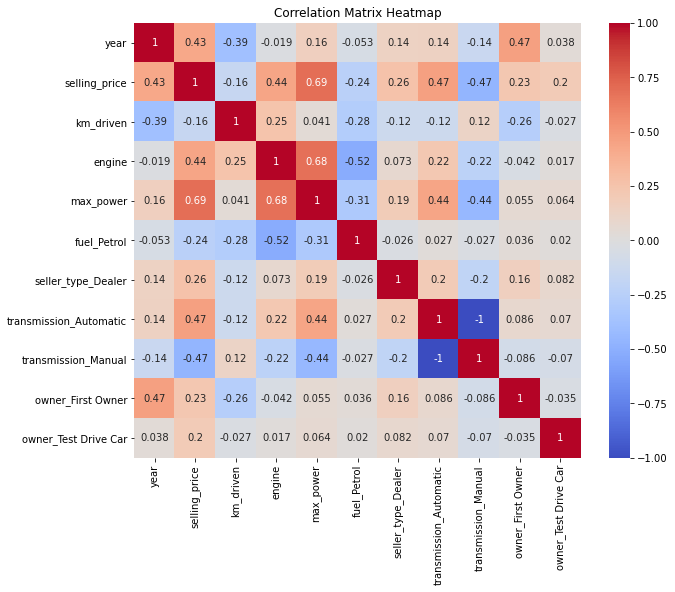

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap above we can see there is strong negative correlation between transmission_automatic and transmission_manual. From Lasso L1 we know transmission_manual contributes more to the target variable hence we will eliminate transmission_automatic

In [117]:
df2 = df1.drop("transmission_Automatic",axis=1)

LINEAR REGRESSION MODEL

In [120]:
#Create datasets for dependent and independent variable
X = df2.drop("selling_price",axis=1)
y = df["selling_price"]

In [125]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Create linear regression model
model = LinearRegression()

In [127]:
# Fit model to training data 
model.fit(X_train, y_train)

LinearRegression()

In [128]:
# Make prediction on test data 
y_pred = model.predict(X_test)

Evaluate the model

In [129]:
# Calculate mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)

In [135]:
print(mse)

0.3347273794253246


In [134]:
r_squared = metrics.r2_score(y_test, y_pred)

In [136]:
print(r_squared)

0.6412850211790397


Scatter plot with Regression Line: helps us see how well the predicted values align with the actual data points

scatter plot: scatter data points of predicted and actual values (y_test and y_predicted)

regression line: 

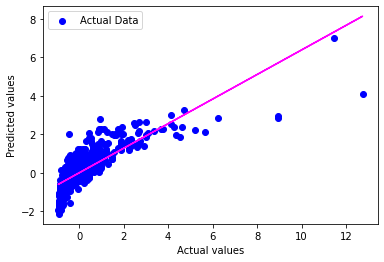

In [160]:
plt.scatter(y_test,y_pred,color='blue', label='Actual Data')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

z = np.polyfit(y_test, y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

plt.legend()
plt.show()

Residual plot: visualize residuals (difference between actual and predicted value) for each data point

check for heteroscedasticity (non-constant variance) as constant variance menas assumption met 

In [165]:
residuals = y_test - y_pred

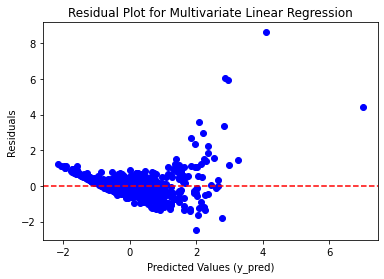

In [166]:
# Create a residual plot
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Multivariate Linear Regression')
plt.show()

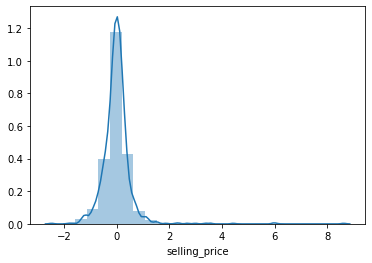

In [168]:
#Distribution of error: Needs to be normal for the assumption to be met 
sns.distplot((y_test-y_pred) ,bins=25)

In [ ]:
coefficients = model.coef_

In [162]:
print(coefficients)

[ 0.24883413 -0.069576    0.02043435  0.52280163 -0.08518864  0.06267942
 -0.16631368  0.0538177   0.11959685]


In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5358 entries, 3948 to 941
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  5358 non-null   float64
 1   km_driven             5358 non-null   float64
 2   engine                5358 non-null   float64
 3   max_power             5358 non-null   float64
 4   fuel_Petrol           5358 non-null   float64
 5   seller_type_Dealer    5358 non-null   float64
 6   transmission_Manual   5358 non-null   float64
 7   owner_First Owner     5358 non-null   float64
 8   owner_Test Drive Car  5358 non-null   float64
dtypes: float64(9)
memory usage: 418.6 KB
